In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from netCDF4 import Dataset

# Data Processing

## read data

In [2]:
dataset = xr.open_mfdataset('/home/disk/eos12/wycheng/data/US/dataset/*.nc')

In [3]:
dataset

<xarray.Dataset>
Dimensions:  (Time: 5848, lat: 40, lev: 10, lon: 75)
Coordinates:
  * Time     (Time) datetime64[ns] 2012-01-01 ... 2013-12-31T21:00:00
  * lat      (lat) float32 20.5 21.5 22.5 23.5 24.5 ... 55.5 56.5 57.5 58.5 59.5
  * lon      (lon) float32 -134.5 -133.5 -132.5 -131.5 ... -62.5 -61.5 -60.5
Dimensions without coordinates: lev
Data variables:
    F        (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    cape     (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    island   (lat, lon) int32 dask.array<chunksize=(40, 75), meta=np.ndarray>
    pcp      (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q        (Time, lev, lat, lon) float32 dask.array<chunksize=(2928, 10, 40, 75), meta=np.ndarray>
    t        (Time, lev, lat, lon) float32 dask.array<chunksize=(2928, 10, 40, 75), meta=np.ndarray>
Attributes:
    creation_date:  Thu Jan  7 18:21:22 PST 2021
    title:

In [4]:
for ilev in range(10):
    exec( 'dataset = dataset.assign(t'+str(ilev)+'=dataset.t[:,ilev,:,:])' )
    exec( 'dataset = dataset.assign(q'+str(ilev)+'=dataset.q[:,ilev,:,:])' )

In [5]:
dataset = dataset.drop('t')
dataset = dataset.drop('q')

In [6]:
dataset

<xarray.Dataset>
Dimensions:  (Time: 5848, lat: 40, lon: 75)
Coordinates:
  * Time     (Time) datetime64[ns] 2012-01-01 ... 2013-12-31T21:00:00
  * lat      (lat) float32 20.5 21.5 22.5 23.5 24.5 ... 55.5 56.5 57.5 58.5 59.5
  * lon      (lon) float32 -134.5 -133.5 -132.5 -131.5 ... -62.5 -61.5 -60.5
Data variables:
    F        (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    cape     (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    island   (lat, lon) int32 dask.array<chunksize=(40, 75), meta=np.ndarray>
    pcp      (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    t0       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q0       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    t1       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q1       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    t2       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q2       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    t3       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q3       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    t4       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q4       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    t5       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q5       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    t6       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q6       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    t7       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q7       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    t8       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q8       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    t9       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
    q9       (Time, lat, lon) float32 dask.array<chunksize=(2928, 40, 75), meta=np.ndarray>
Attributes:
    creation_date:  Thu Jan  7 18:21:22 PST 2021
    title:

In [5]:
#dataset.load().to_netcdf(path='/home/disk/eos12/wycheng/dataset.nc')

In [7]:
dataframe = dataset.where( (dataset.island == 1) & (dataset.pcp<0.833) ).to_dataframe().dropna(axis=0)

In [8]:
dataframe = dataframe.assign(isT=np.where( (dataframe.F>=1),1,0) )
dataframe = dataframe.assign(isDT=np.where( (dataframe.pcp<0.833) & (dataframe.F>=1),1,0) )

## check data

In [69]:
dataframe.drop(columns=['island', 'F','t4','t5','t6','t7','t8','t9','q4','q5','q6','q7','q8','q9','isT'])

cape       pcp          t0        q0  \
Time                lat  lon                                                  
2012-01-01 00:00:00 20.5 -105.5   26.936972  0.045319  295.836792  0.011929   
                         -104.5  193.959839  0.619060  301.743896  0.009002   
                         -102.5    0.000000  0.698779  305.431702  0.005713   
                         -101.5   17.618164  0.047142  305.132263  0.006185   
                         -100.5   28.618326  0.000000  303.465942  0.005842   
...                                     ...       ...         ...       ...   
2013-12-31 21:00:00 49.5 -71.5     0.001953  0.000000  246.937332  0.000258   
                         -70.5     0.001953  0.000000  247.030014  0.000258   
                         -69.5     0.030273  0.000000  247.025681  0.000265   
                         -68.5     0.497640  0.000000  247.383041  0.000280   
                         -67.5     3.034139  0.000000  248.916306  0.000342   

                                         t1        q1          t2        q2  \
Time                lat  lon                                                  
2012-01-01 00:00:00 20.5 -105.5  295.381714  0.003189  289.650482  0.005069   
                         -104.5  295.877563  0.008559  289.895386  0.006373   
                         -102.5  299.434540  0.005713  292.451080  0.005224   
                         -101.5  299.173859  0.006185  292.542938  0.005960   
                         -100.5  297.980865  0.005842  291.999542  0.005853   
...                                     ...       ...         ...       ...   
2013-12-31 21:00:00 49.5 -71.5   243.890015  0.000267  245.654678  0.000229   
                         -70.5   242.712494  0.000238  245.797928  0.000208   
                         -69.5   242.903488  0.000229  246.240280  0.000197   
                         -68.5   244.721466  0.000244  246.516434  0.000204   
                         -67.5   245.988663  0.000264  247.296173  0.000221   

                                         t3        q3  isDT  
Time                lat  lon                                 
2012-01-01 00:00:00 20.5 -105.5  281.005524  0.003619     0  
                         -104.5  281.310608  0.004393     0  
                         -102.5  282.444916  0.004733     1  
                         -101.5  282.844421  0.004909     1  
                         -100.5  282.812286  0.004971     1  
...                                     ...       ...   ...  
2013-12-31 21:00:00 49.5 -71.5   241.468277  0.000230     0  
                         -70.5   242.299942  0.000244     0  
                         -69.5   243.170029  0.000275     0  
                         -68.5   244.069260  0.000321     0  
                         -67.5   245.112625  0.000366     0  

[6366461 rows x 11 columns]

In [66]:
dataframe.drop(columns=['island', 'F','t0','t1','t2','t3','t4','t5','t6','t7','t8','t9','q0','q1','q2','q3','q4','q5','q6','q7','q8','q9','isT'])

cape       pcp  isDT
Time                lat  lon                               
2012-01-01 00:00:00 20.5 -105.5   26.936972  0.045319     0
                         -104.5  193.959839  0.619060     0
                         -102.5    0.000000  0.698779     1
                         -101.5   17.618164  0.047142     1
                         -100.5   28.618326  0.000000     1
...                                     ...       ...   ...
2013-12-31 21:00:00 49.5 -71.5     0.001953  0.000000     0
                         -70.5     0.001953  0.000000     0
                         -69.5     0.030273  0.000000     0
                         -68.5     0.497640  0.000000     0
                         -67.5     3.034139  0.000000     0

[6366461 rows x 3 columns]

In [10]:
dataframe.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6366461 entries, (Timestamp('2012-01-01 00:00:00'), 20.5, -105.5) to (Timestamp('2013-12-31 21:00:00'), 49.5, -67.5)
Data columns (total 26 columns):
 #   Column  Dtype  
---  ------  -----  
 0   F       float32
 1   cape    float32
 2   island  float64
 3   pcp     float32
 4   t0      float32
 5   q0      float32
 6   t1      float32
 7   q1      float32
 8   t2      float32
 9   q2      float32
 10  t3      float32
 11  q3      float32
 12  t4      float32
 13  q4      float32
 14  t5      float32
 15  q5      float32
 16  t6      float32
 17  q6      float32
 18  t7      float32
 19  q7      float32
 20  t8      float32
 21  q8      float32
 22  t9      float32
 23  q9      float32
 24  isT     int64  
 25  isDT    int64  
dtypes: float32(23), float64(1), int64(2)
memory usage: 728.8 MB


## formatting input (training/test) data

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [13]:
feature_name  = ['cape','pcp']
for ilev in range(10):
    exec( 'feature_name.append(\"t'+str(ilev)+'\")' )
    exec( 'feature_name.append(\"q'+str(ilev)+'\")' )
output_name   = ['isDT']

In [15]:
X = dataframe[feature_name]
y = dataframe[output_name]

In [16]:
print(y.where(y.isDT==0).count())
print(y.where(y.isDT>=1).count())

isDT    6002568
dtype: int64
isDT    363893
dtype: int64


In [19]:
undersample = RandomUnderSampler(sampling_strategy=0.25)

In [20]:
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.33, random_state=None)
X_train, y_train = undersample.fit_resample(X_train_raw, y_train_raw)

In [21]:
print(X_train.info())
print(y_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218200 entries, 0 to 1218199
Data columns (total 22 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   cape    1218200 non-null  float32
 1   pcp     1218200 non-null  float32
 2   t0      1218200 non-null  float32
 3   q0      1218200 non-null  float32
 4   t1      1218200 non-null  float32
 5   q1      1218200 non-null  float32
 6   t2      1218200 non-null  float32
 7   q2      1218200 non-null  float32
 8   t3      1218200 non-null  float32
 9   q3      1218200 non-null  float32
 10  t4      1218200 non-null  float32
 11  q4      1218200 non-null  float32
 12  t5      1218200 non-null  float32
 13  q5      1218200 non-null  float32
 14  t6      1218200 non-null  float32
 15  q6      1218200 non-null  float32
 16  t7      1218200 non-null  float32
 17  q7      1218200 non-null  float32
 18  t8      1218200 non-null  float32
 19  q8      1218200 non-null  float32
 20  t9      1218200 non-null

# ML

## R14

In [22]:
import scipy as sp
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import normalize

In [23]:
class R14:
    
    def fit(CAPE,pcp,y):

        thrs = sp.optimize.fminbound(lambda x: -f1_score(y, ((CAPE*pcp > x) * 1.0).astype(int)), 0, 4000)
        fval = f1_score(y, ((CAPE*pcp >= thrs) * 1.0).astype(int))
        
        return thrs, fval
    
    def predict(CAPE,pcp,thrs):
        
        y_predict = ((CAPE*pcp >= thrs) * 1.0).astype(int)
        y_predict_proba = CAPE*pcp
        
        return y_predict, y_predict_proba/np.max(y_predict_proba)

In [24]:
[r14_thrs,fval] = R14.fit(X_train['cape'],X_train['pcp'],y_train)

In [25]:
print(r14_thrs, fval)

0.21072004684035076 0.5659617900320573


In [26]:
r14_thrs_linspace = np.linspace(np.max(r14_thrs-10,0),r14_thrs+10,num=20)
fval_linspace     = np.zeros(np.shape(r14_thrs_linspace))

In [27]:
i = 0
for r14_thrs_i in r14_thrs_linspace:
    fval_linspace[i] = f1_score(y_train['isDT'], ((X_train['cape']*X_train['pcp'] >= r14_thrs_i) * 1.0).astype(int))
    i = i+1

Text(0, 0.5, 'F1 score')

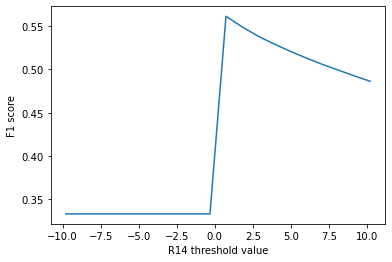

In [28]:
plt.plot(r14_thrs_linspace,fval_linspace)
plt.xlabel('R14 threshold value')
plt.ylabel('F1 score')

In [29]:
y_predict_r14, y_predict_prob_r14 = R14.predict(X_test['cape'],X_test['pcp'],r14_thrs)

## random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rfclf = RandomForestClassifier(n_estimators=10, max_depth=4, min_samples_split=10, random_state=0)

In [32]:
rfclf.fit(X_train[feature_name], y_train[output_name])

<ipython-input-32-f484fe52f948>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclf.fit(X_train[feature_name], y_train[output_name])


RandomForestClassifier(max_depth=4, min_samples_split=10, n_estimators=10,
                       random_state=0)

In [33]:
y_predict_rfclf = rfclf.predict(X_test[feature_name])

In [49]:
rfclf0 = RandomForestClassifier(n_estimators=10, max_depth=4, min_samples_split=10, random_state=0)
rfclf0.fit(X_train[['cape','pcp']], y_train[output_name])
y_predict_rfclf0 = rfclf0.predict(X_test[['cape','pcp']])

<ipython-input-49-766f6d78578f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclf0.fit(X_train[['cape','pcp']], y_train[output_name])


## Model Evaluation

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

In [35]:
pd.DataFrame(
    [[precision_score(y_test['isDT'], y_predict_r14),\
      recall_score(y_test['isDT'], y_predict_r14),\
      f1_score(y_test['isDT'], y_predict_r14)],\
     [precision_score(y_test['isDT'], y_predict_rfclf),\
      recall_score(y_test['isDT'], y_predict_rfclf),\
      f1_score(y_test['isDT'], y_predict_rfclf)]],
    columns=['Precision Score', 'Recall Score', 'F1 Score'],
    index=['R14', 'RFC']
).style.apply(lambda x: ["background: yellow" if v == x.max() else "" for v in x], axis = 0)

,Precision Score,Recall Score,F1 Score
R14,0.341176,0.485493,0.400737
RFC,0.350613,0.578688,0.436663


In [36]:
auc_rfclf = metrics.roc_auc_score(y_test, rfclf.predict_proba(X_test)[:,1])
auc_r14   = metrics.roc_auc_score(y_test, y_predict_prob_r14)
print(auc_rfclf, auc_r14)

0.9010290352494552 0.7250249004197207


In [37]:
xthrs = np.linspace(0,4000,20)
fpr = []
tpr = []
for i in range(np.size(xthrs)):
    yp, fv = R14.predict(X_test['cape'],X_test['pcp'],xthrs[i])
    tn, fp, fn, tp = confusion_matrix(y_test['isDT'], yp).ravel()
    fpr.append( (fp/(fp+tn)) ) 
    tpr.append( (tp/(tp+fn)) )

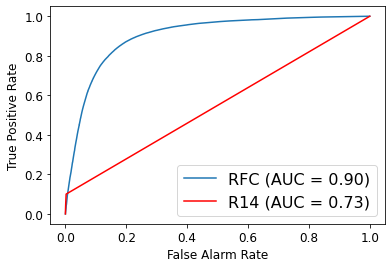

In [55]:
plt.rcParams.update({'font.size': 12})
plot_roc_curve(rfclf, X_test, y_test, label='RFC (AUC = %0.2f)'%(auc_rfclf) )
plt.plot(fpr, tpr, 'r-',label='R14 (AUC = %0.2f)'%(auc_r14))

plt.xlabel('False Alarm Rate')
plt.ylabel('True Positive Rate')
plt.legend(fontsize=16)
plt.show()  

In [56]:
from sklearn.metrics import roc_curve

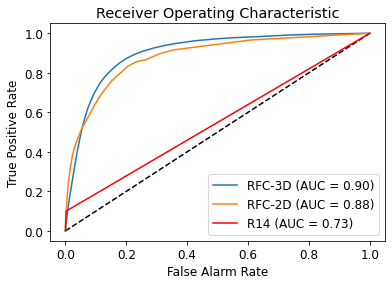

In [59]:
y_pred_prob1 = rfclf.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = rfclf0.predict_proba(X_test[['cape','pcp']])[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label='RFC-3D (AUC = 0.90)') 
plt.plot(fpr2, tpr2, label='RFC-2D (AUC = 0.88)')
plt.plot(fpr, tpr, 'r-',label='R14 (AUC = %0.2f)'%(auc_r14))
plt.legend()
plt.xlabel('False Alarm Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

In [39]:
pd.DataFrame(
    confusion_matrix(y_test['isDT'], y_predict_rfclf),
    columns=['Predicted No DT', 'Predicted DT'],
    index=['True No DT', 'True DT']
)

,Predicted No DT,Predicted DT
True No DT,1851791,128889
True DT,50664,69589


In [40]:
pd.DataFrame(
    confusion_matrix(y_test['isDT'], y_predict_r14),
    columns=['Predicted No DT', 'Predicted DT'],
    index=['True No DT', 'True DT']
)

,Predicted No DT,Predicted DT
True No DT,1867942,112738
True DT,61871,58382


## Plots

In [41]:
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mticker

In [42]:
idx = y_test.index
y_predict_r14_df   = pd.DataFrame(y_predict_r14, index=idx, columns=['y_predict_r14'])
y_predict_rfclf_df = pd.DataFrame(y_predict_rfclf, index=idx, columns=['y_predict_rfclf'])

In [43]:
def plot_map(figsize,data,cmap,vmin=None,vmax=None,title=None,unit=None):
    
    fig   = plt.figure(figsize=figsize)

    pcm = data.plot.pcolormesh("lon","lat",
        subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor="white"),
        transform=ccrs.PlateCarree(),
        cmap=cmap,
        vmin=vmin,vmax=vmax,
        add_colorbar = False,
    )
    pcm.axes.set_extent([-135, -60, 20, 60], ccrs.PlateCarree())
    gl = pcm.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator([-130, -120, -110, -100, -90, -80, -70, -60])
    gl.ylocator = mticker.FixedLocator([20, 30, 40, 50, 60])
    gl.xlabels_top   = False
    gl.ylabels_right = False
    pcm.axes.coastlines()
    plt.title(title)

    divider = make_axes_locatable(pcm.axes)
    cax     = divider.append_axes("right", size="2%", pad=1, axes_class=plt.Axes)
    cbar    = plt.colorbar(pcm, cax=cax,extend='max')
    plt.text(vmin,vmax*1.08,unit)

/home/disk/p/wycheng/anaconda3/envs/incubator2021/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/disk/p/wycheng/anaconda3/envs/incubator2021/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


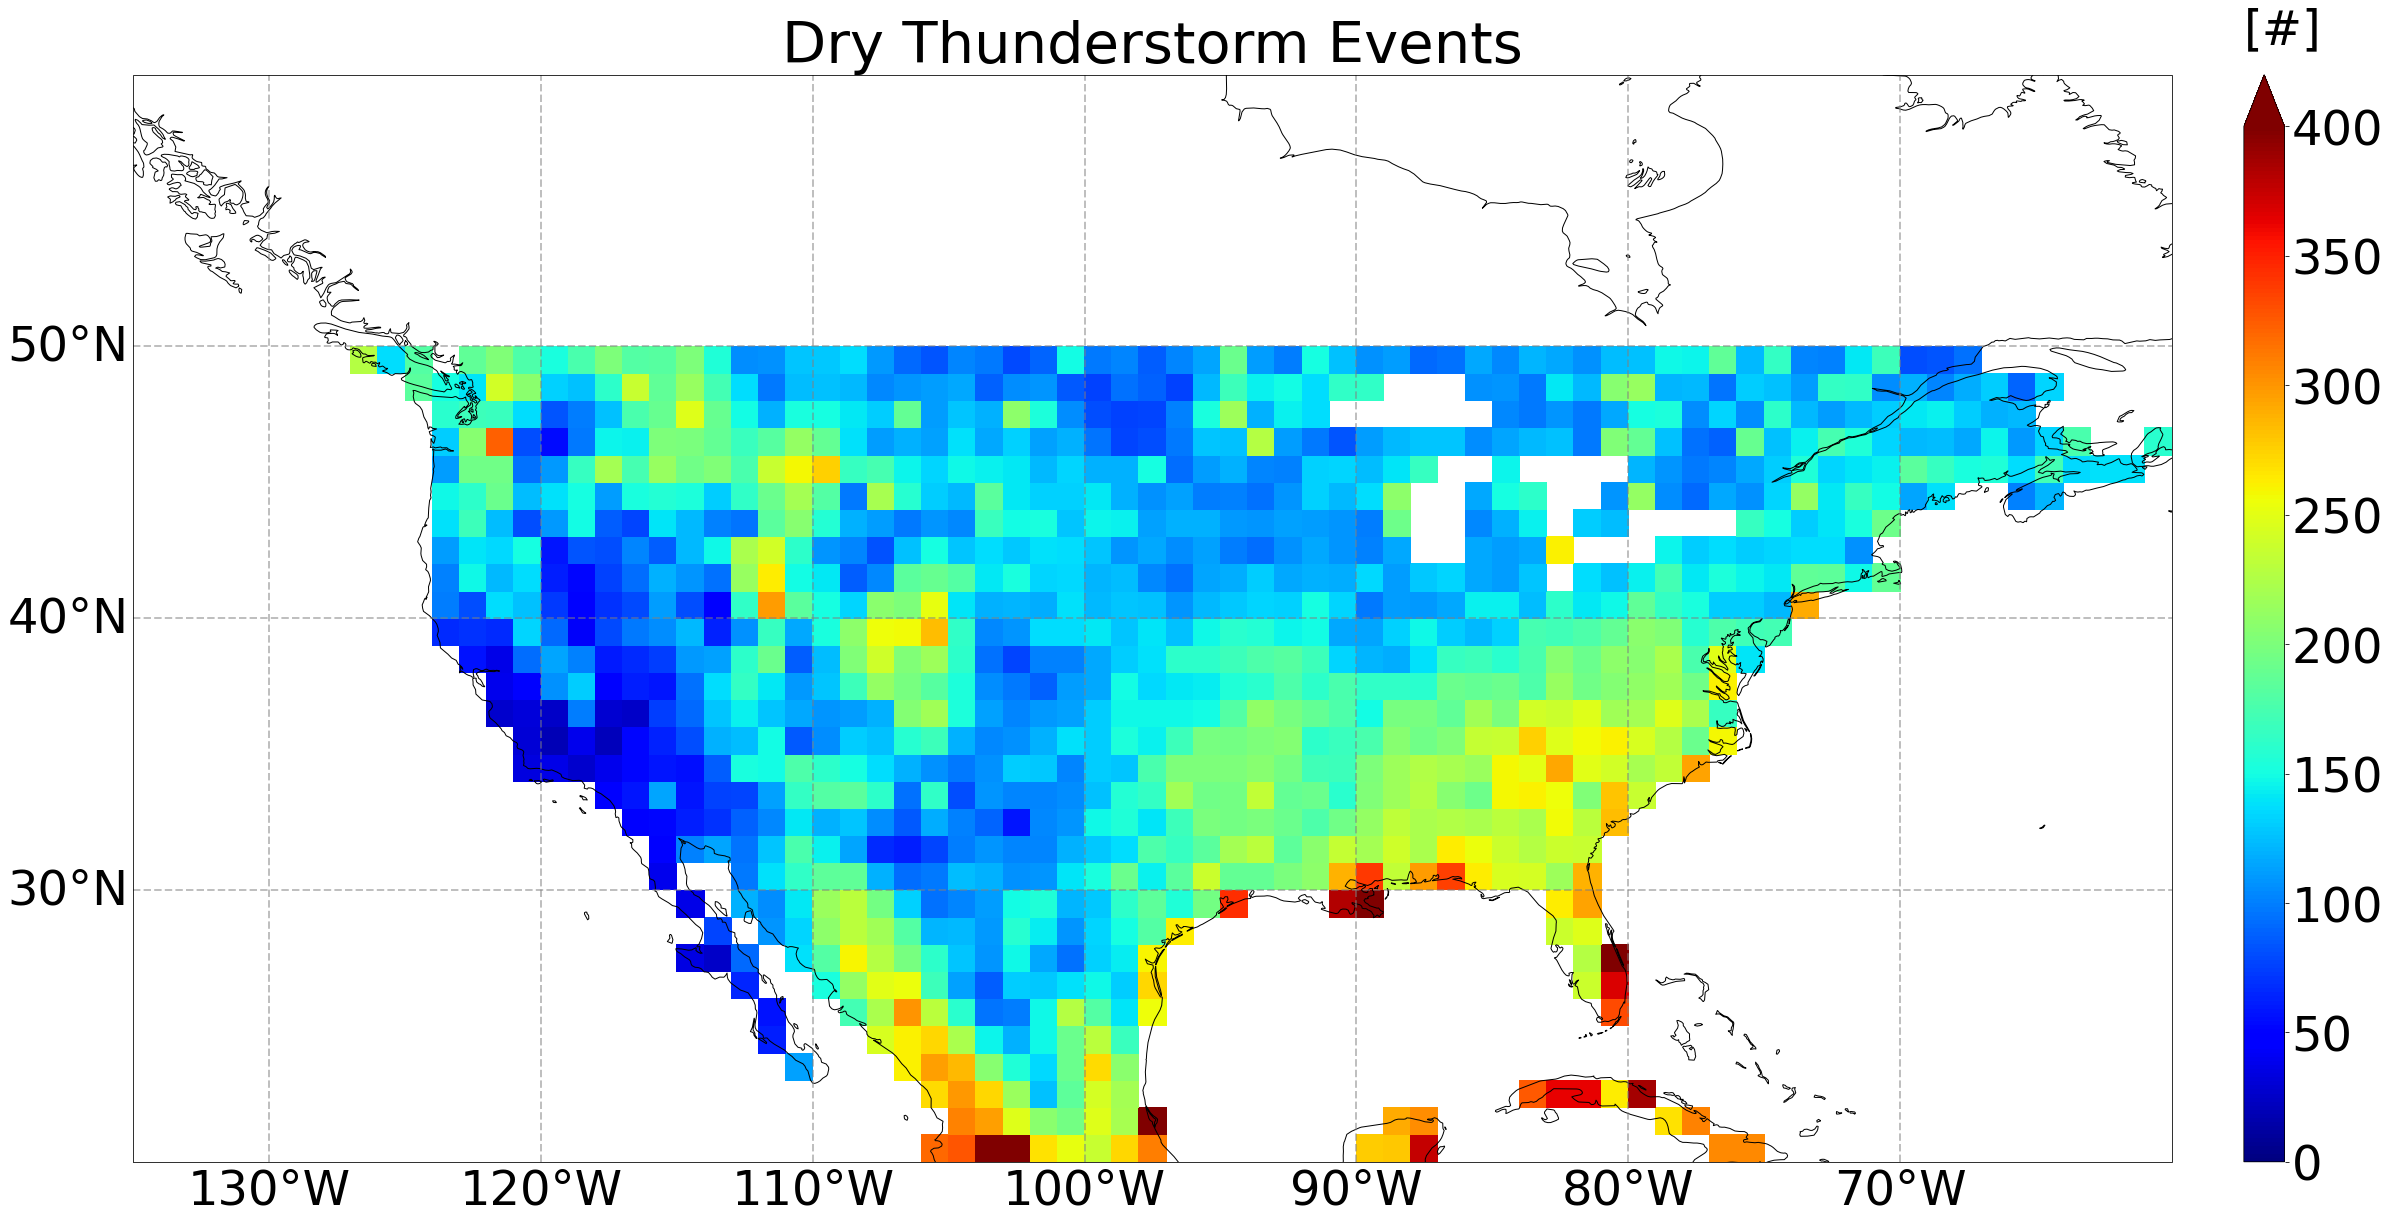

In [45]:
plt.rcParams.update({'font.size': 48})
figsize = (40,20)
data  = y_predict_r14_df['y_predict_r14'].groupby(['lat','lon']).sum().to_xarray().where(dataset.island==1)
cmap  = plt.get_cmap('jet')
vmin  = 0
vmax  = 400
title = 'Dry Thunderstorm Events'
unit  = '[#]'

plot_map(figsize,data=data,cmap=cmap,vmin=vmin,vmax=vmax,title=title,unit=unit)

/home/disk/p/wycheng/anaconda3/envs/incubator2021/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/disk/p/wycheng/anaconda3/envs/incubator2021/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


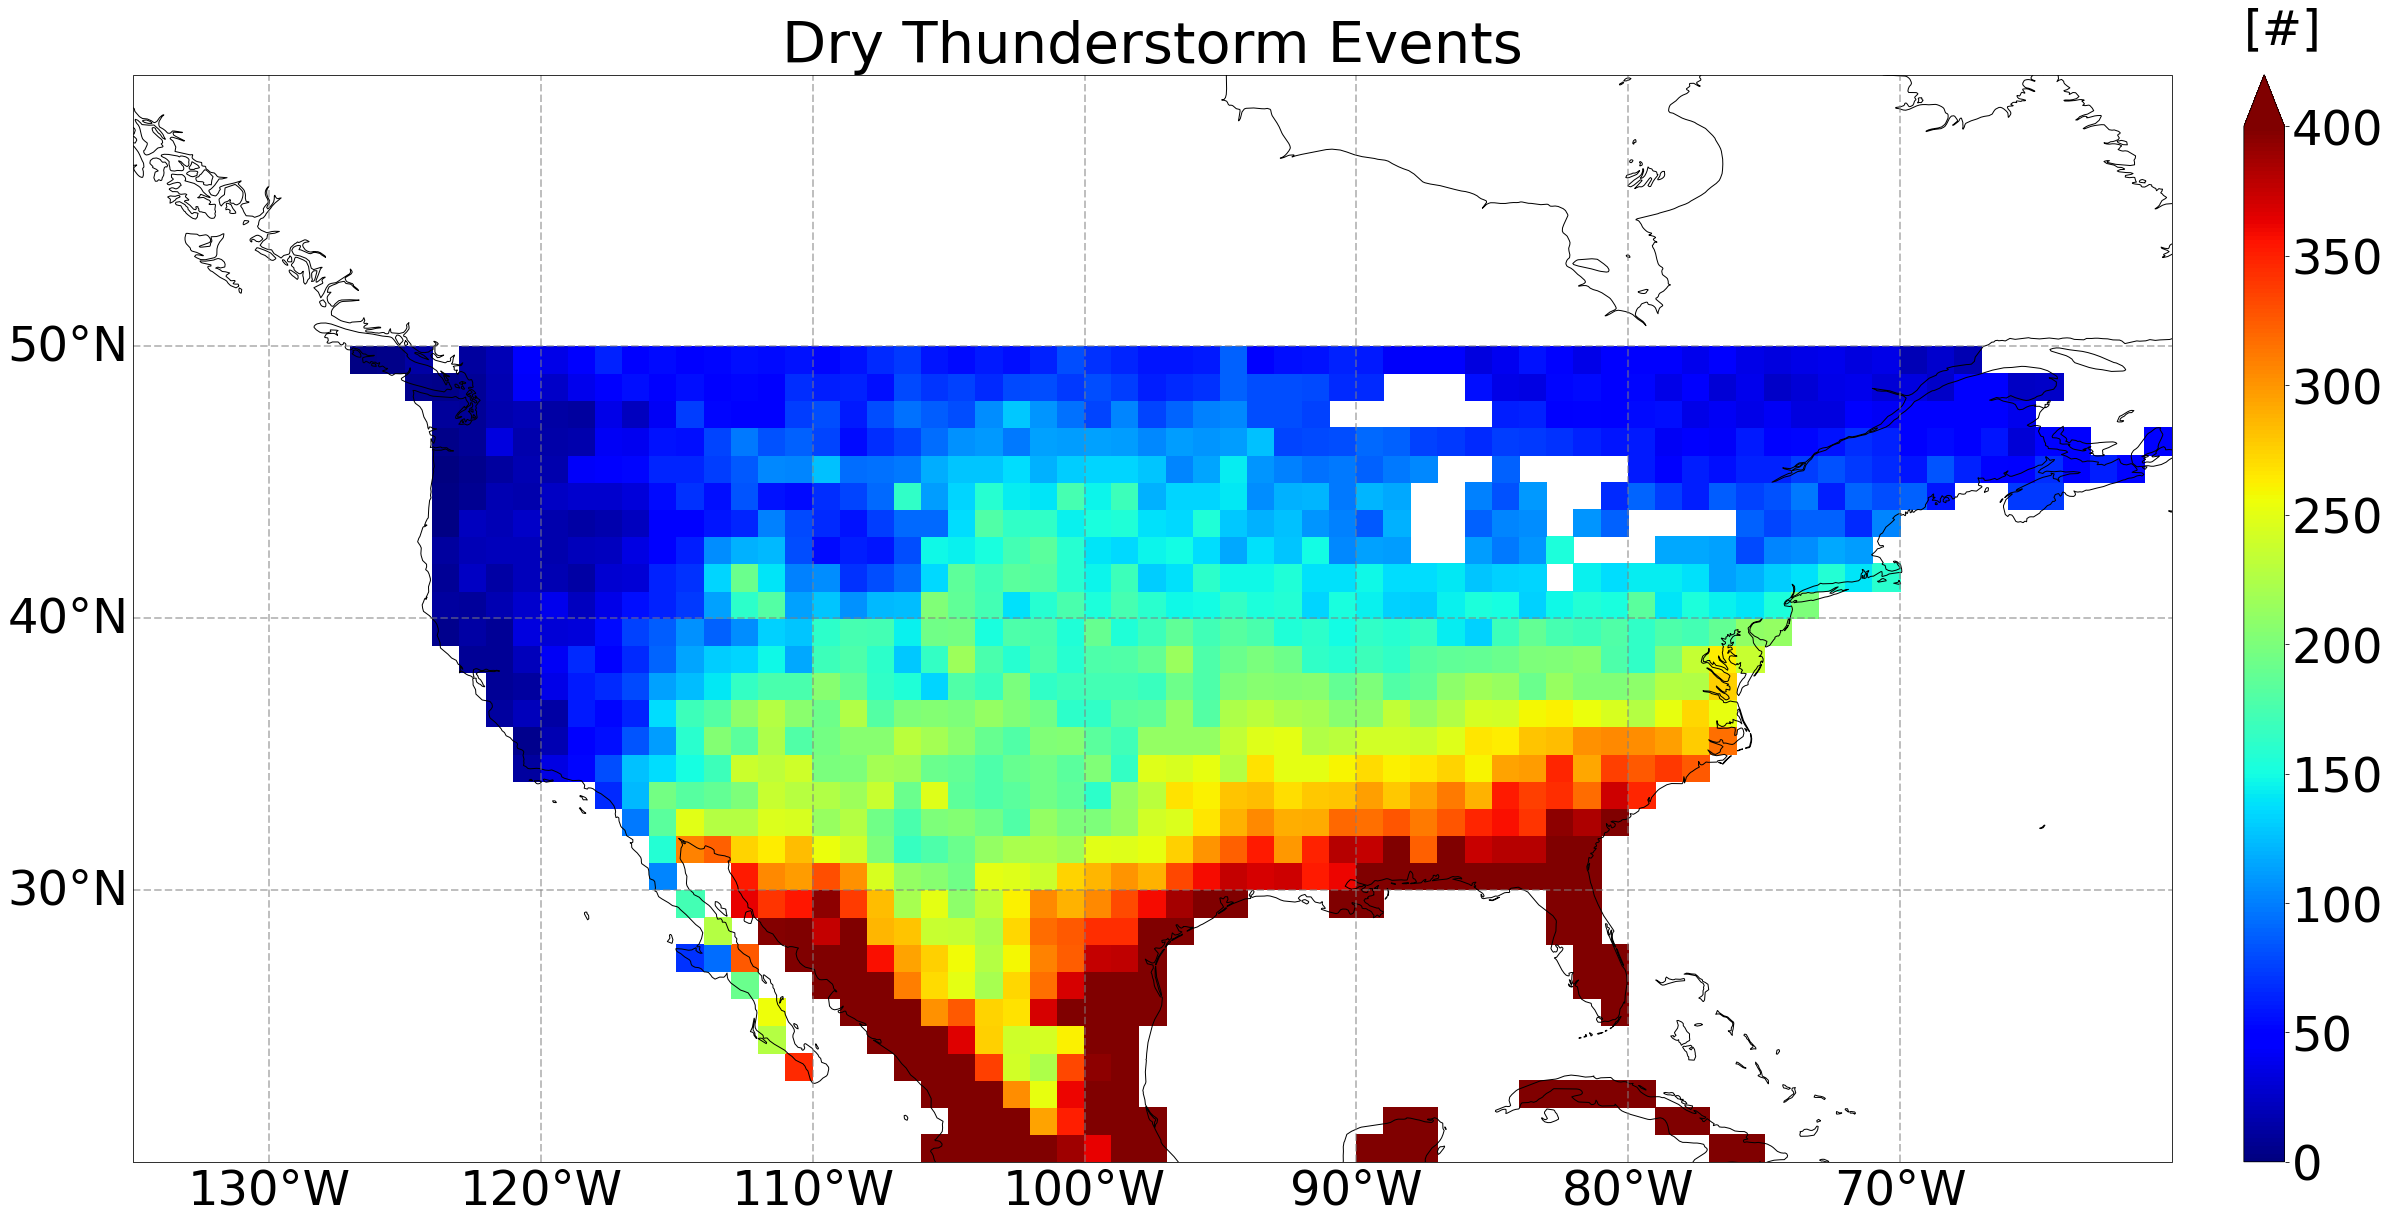

In [46]:
plt.rcParams.update({'font.size': 48})
figsize = (40,20)
data  = y_predict_rfclf_df['y_predict_rfclf'].groupby(['lat','lon']).sum().to_xarray().where(dataset.island==1)
cmap  = plt.get_cmap('jet')
vmin  = 0
vmax  = 400
title = 'Dry Thunderstorm Events'
unit  = '[#]'

plot_map(figsize,data=data,cmap=cmap,vmin=vmin,vmax=vmax,title=title,unit=unit)

/home/disk/p/wycheng/anaconda3/envs/incubator2021/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/disk/p/wycheng/anaconda3/envs/incubator2021/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


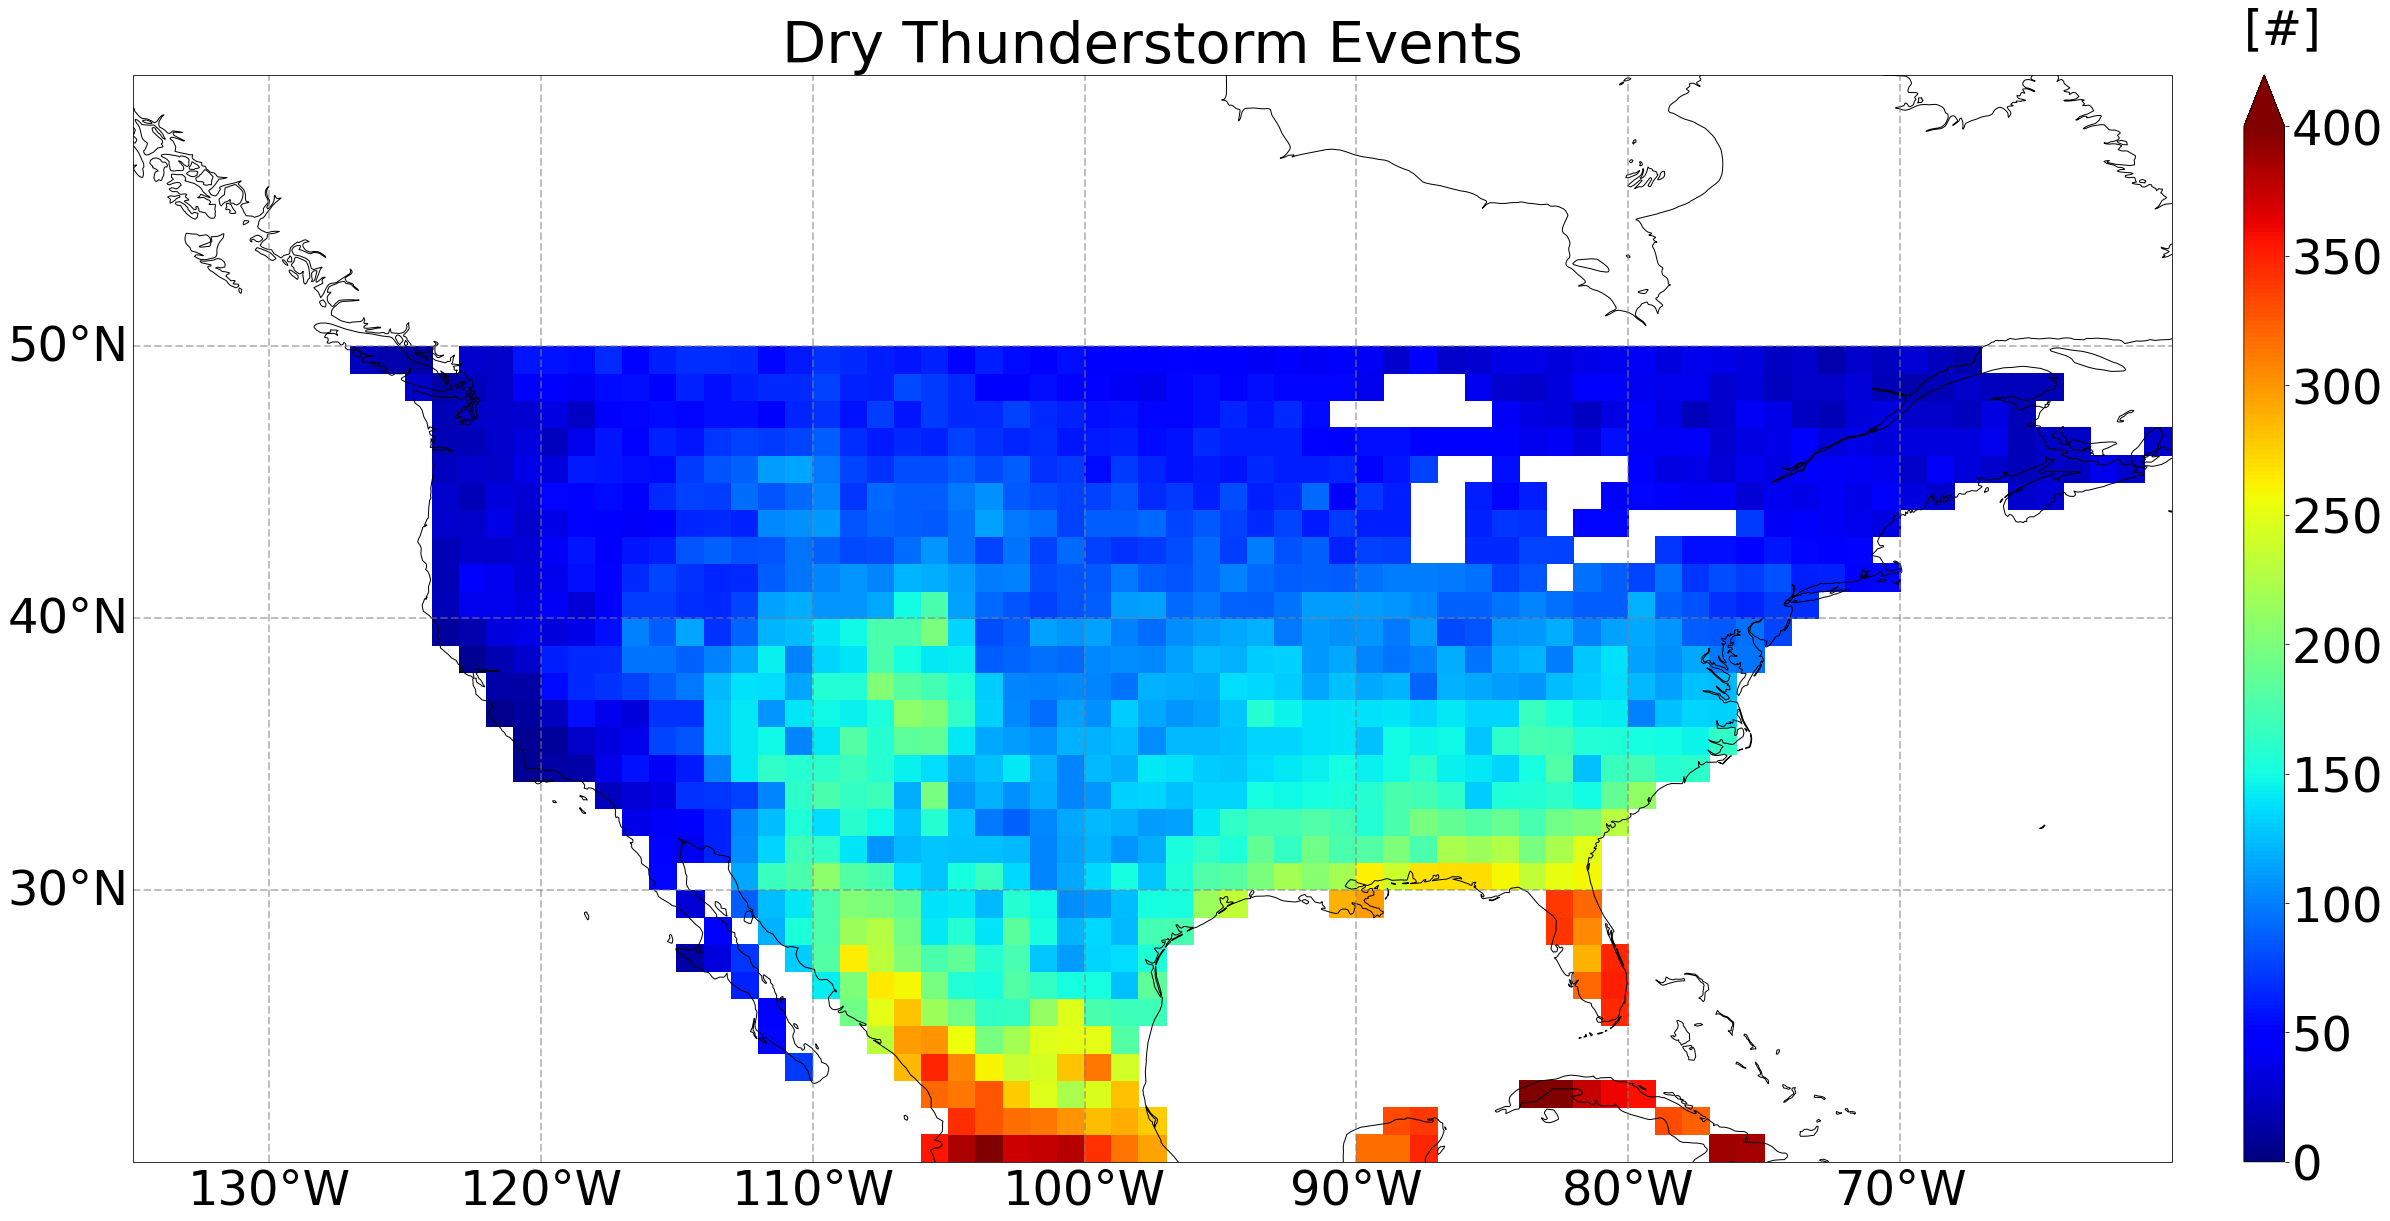

In [47]:
plt.rcParams.update({'font.size': 48})
figsize = (40,20)
data  = y_test['isDT'].groupby(['lat','lon']).sum().to_xarray().where(dataset.island==1)
cmap  = plt.get_cmap('jet')
vmin  = 0
vmax  = 400
title = 'Dry Thunderstorm Events'
unit  = '[#]'

plot_map(figsize,data=data,cmap=cmap,vmin=vmin,vmax=vmax,title=title,unit=unit)